<a href="https://colab.research.google.com/github/jvplopes/Trade-Russia/blob/main/Russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados comerciais da Rússia

Enquanto a Rússia continua os ataques militares à Ucrânia e o presidente Zelenskyy solicita esforços de outros países para conter a invasão, sanções econômicas são impostas à Rússia.

Países como o Canada, União Europeia, Japão, Nova Zelândia, Taiwan, Reino Unido e Estados Unidos anunciam retaliações econômicas.
Até o momento, essas sanções econômicas não foram suficientes para conter a invasão russa.

Para verificar o alcance dessas sanções econômicas, verificaremos os dados comercias da Rússia entre os anos de 1996 e 2019 fornecidos pelo [World Integrated Trade Solution (WITS)](https://wits.worldbank.org/https://wits.worldbank.org/).


## Obtenção dos Dados

Os dados utilizados foram obtidos pelo [WITS REST API](https://wits.worldbank.org/witsapiintro.aspx?lang=en) que fornece os seguintes valores:

| Valor | Descrição |
| :-: | :-: |
|Reporter|País analisado (ISO3 e nome)|
|Partner|Parceiro comercial (ISO3 e nome)|
|Product Code|Código do grupo de produto|
|Year|Ano|
|Indicator|Pode ser um código indicador de Comércio, Tarifa ou Desenvolvimento|

Os valores estão em dólar americano (US$). 

## Análise Exploratória dos Dados

Nesta fase, será verificada algumas características do dataset: tamanho, tipos dos dados e dados ausentes.

In [ ]:
#world_trade_data API
!pip install world_trade_data --upgrade

#API
import world_trade_data as wits

In [3]:
#Todos os produtos do API
products = wits.get_products()

In [ ]:
products.info()

São 31 produtos fornecidos pelo API, sem valores nulos.

In [4]:
#Todos os países fornecidos pelo API
countries = wits.get_countries()

In [ ]:
countries.info()

São fornecidos dados de 266 paises.

In [5]:
#Indicadores fornecidos pelo API
indicators = wits.get_indicators()

In [ ]:
indicators.info()

O API fornece 20 indicadores para análise. Nessa análise utilizaremos o MPRT-TRD-VL e XPRT-TRD-VL.

In [6]:
#Plot com interação
!pip install ipywidgets -q

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import io
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as tick

#interação
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

In [8]:
#cores

blue = '#546de5'
red = '#e15f41'
gray='#596275'
dark_gray='#303952'

In [9]:
#Transforma os tick de valores altos (Bilhões, milhões e milhares) em abreviações B, M e K.
def format_tick(tick_val, pos):
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:} B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:} M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:} K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # Converte o new_tick_format em string
    new_tick_format = str(new_tick_format)
    
    # Remove o 0 após o ponto decimal.
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # Remove o 0 após o ponto
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

##Importação e Exportação | Rússia

O API fornece dados comerciais entre os anos de 1996 e 2019

In [10]:
#Anos contidos no dataset 1996-2019
years = range(1996,2020)

In [11]:
#Valores totais de importação e exportação por ano
imports_total = []
exports_total = []

In [12]:
#Função que preenche as listas 'imports_total' e 'exports_total'
def trade_by_year(year):
  for year in years:

    imports = wits.get_indicator('MPRT-TRD-VL', reporter='rus', year=str(year))
    total = imports.Value.array[23] * 1000
    imports_total.append(total)


    exports = wits.get_indicator('XPRT-TRD-VL', reporter='rus', year=str(year))
    total = exports.Value.array[23] * 1000
    exports_total.append(total)

trade_by_year(years)

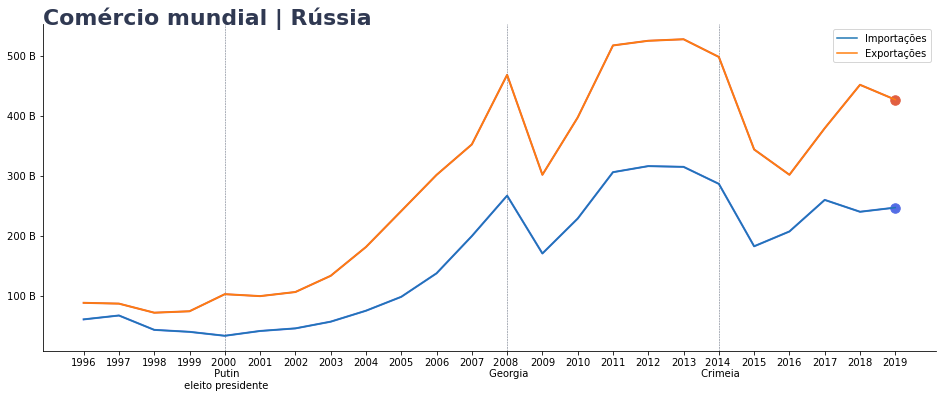

In [30]:
#Line Plot
fig, ax = plt.subplots(figsize=(16,6), dpi=72)

x = years

#personaliza a label do eixo x
p =list(years)
p[4] = '2000 \n Putin\n eleito presidente'
p[12] = '2008 \n Georgia'
p[18] = '2014 \n Crimeia'

#Imports
ax.plot(x, imports_total, color=blue, linewidth=2)

#Exports
ax.plot(x, exports_total, color=red, linewidth=2)

#Configurar xticks para exibir todos os anos
ax.set_xticks(ticks=years);
ax.set_xticklabels(labels=p, rotation=0.0);

# title
ax.text(0,1,'Comércio mundial | Rússia', fontsize=22, color=dark_gray, fontweight='bold', transform=ax.transAxes)
#ax.text(-0.5, 230,'KPI de engajamento, que considera a quantidade\nde acessos únicos e projetos enviados para\nrevisão  do Sigmoidal', fontsize=13, color=gray)


# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Linha vertical
ax.axvline(2000, color=gray, linestyle='--', lw=0.5)
ax.axvline(2008, color=gray, linestyle='--', lw=0.5)
ax.axvline(2014, color=gray, linestyle='--', lw=0.5)

#Personaliza o ytick
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

ax.plot(x, imports_total, label='Importações')
ax.plot(x, exports_total, label='Exportações')
leg = ax.legend(loc='upper right')

# plots dos scatter plots
ax.scatter(x[-1:], imports_total[-1:], s=90, color=blue, clip_on=False)
ax.scatter(x[-1:], exports_total[-1:], s=90, color=red, clip_on=False)

fig.savefig('russiatrade.png')



O atual presidente da Rússia, Putin, assumiu a presidência no dia 7 de maio de 2000. Nesse ano, as exportações Russas estavam no valor de 103 bilhões e as importações em 33 bilhões.
Em 2013, a Rússia alcançou o maior valor de exportação (529 bilhões) e de importação (314 bilhões).
Durante esse período, o Putin só deixou a presidência no período de 2008 a 2012, período no qual ele exerceu a função de 1º ministro.

In [34]:
imports_musd = imports_total[-1]
exports_musd = exports_total[-1]
print('Ano: 2019')
print('Importação: ', imports_musd)
print('Importação: ', exports_musd)

Ano: 2019
Importação:  247161342900.21
Importação:  426720332660.17004


##Comércio por produto | Rússia

O principal setor de exportação da Rússia é o de combustíveis (gás natural e petróleo). Em 2014, esse setor era responsável por 69% da exportações. Após as sanções de 2014, chegou ao nível de 48% em 2016 e 52% em 2019.

Em 2022 está previsto o lançamento de um segundo gasoduto (Nord Stream II) que levará gás natural para a Alemanha. Após a invasão na Ucrânia, a Alemanha ameaçou não ativar o gasoduto.

O segundo maior setor de exportação (metais) manteve-se na mesma proporção (8%). Outros setores, praticamente não sofreram modificações.

In [45]:
def get_html(ano):
  year = str(ano)

  imports = wits.get_indicator('MPRT-TRD-VL', reporter='rus', year=year)
  exports = wits.get_indicator('XPRT-TRD-VL', reporter='rus', year=year)

  imports = imports.loc['Annual'].loc['Russian Federation'].loc['World']
  exports = exports.loc['Annual'].loc['Russian Federation'].loc['World']

  #Setores excluindo a entrada 'All Products'
  sectors = products.loc[(products.grouptype=='Sector') & (products.index!='Total')].productdescription.values

  imports.loc[sectors].Value


  imports_musd = imports.loc[sectors].Value * 1000
  exports_musd = exports.loc[sectors].Value * 1000

  fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
  fig.add_trace(go.Pie(labels=sectors, values=imports_musd, name="Imports"), 1, 1)
  fig.add_trace(go.Pie(labels=sectors, values=exports_musd, name="Exports"), 1, 2)

  fig.update_traces(hole=.4, 
                    #scalegroup='rus',
                    textinfo='label',
                    hovertemplate = "%{label}<br>%{value:,.0f}M$<br>%{percent}")

  fig.update_layout(
      title_text="Estatística do comércio | Rússia | " + str(year),
      annotations=[dict(text='Importação<br>{:.0f}B$'.format(imports_musd.sum()/1e9),
                        x=0.13, y=0.45, font_size=16, showarrow=False),
                  dict(text='Exportação<br>{:.0f}B$'.format(exports_musd.sum()/1e9),
                        x=0.87, y=0.45, font_size=16, showarrow=False)
                        ]
  )

  #plotly.offline.plot(fig, filename='/content/'+ year +'.html')
  fig.show();


In [46]:
# muda o slope, sabendo que é um integer, ele sabe que é slider

interact(get_html, ano=(1996,2019,1))

interactive(children=(IntSlider(value=2007, description='ano', max=2019, min=1996), Output()), _dom_classes=('…

<function __main__.get_html>

##Principais parceiros comerciais | 2019

Os principais parceiros comerciais da Rússia em 2019 são: China, Holanda, Alemanha, Bielorrússia, Turquia e Itália.

In [47]:
#Lista com os dados dos países (nome, iso code, total de importação, total de exportação)
countries_data = []

In [48]:
#Carrega o coutries_data com os dados
def countries_data_load(countries):
  for index, row in countries.iterrows():
    #Nome e Iso code 3
    name = row[0]
    code = row.name

    #Total import
    
    try:
      imports = wits.get_indicator('MPRT-TRD-VL', reporter='rus', year='2019', partner=code)

      #valores das importaçãos
      valores = imports.Value

      #Valor máximo, que é o All products
      imports_total = valores.max() *1000

    except:
      #print(code, name)
      imports_total = 0
    
    
    #Total export
    try:
      exports = wits.get_indicator('XPRT-TRD-VL', reporter='rus', year='2019', partner=code)

      #valores das exportações
      valores = exports.Value 

      #Valor máximo, que é o All products
      exports_total = valores.max() *1000
    except:
      #print(code, name)
      exports_total = 0

    countries_data.append([code, name, imports_total, exports_total])

countries_data_load(countries)

In [49]:
#Cria o dataframe com os valores dos países
df_partners = pd.DataFrame(data=countries_data, index=None, columns=['iso_code_3', 'partner', 'import_total', 'export_total'])

In [ ]:
# Remoção de entradas que não são países
excluidos = ['World', 'Europe & Central Asia', 'East Asia & Pacific',
             'North America	', 'Latin America & Caribbean	', 'Middle East & North Africa',
             'North America', 'South Asia']

df_partners = df_partners.drop(df_partners.loc[df_partners['partner'].isin(excluidos)].index)

df_partners.drop_duplicates(subset=['iso_code_3'])

In [51]:
#Países com maiores valores de importação
imports_partners = df_partners.sort_values(by = "import_total", ascending = False)[0:5]

In [52]:
#Total de importações dos 5 países parceiros
imports_partners_total = imports_partners.import_total.sum()

In [ ]:
#total percent
imports_partners_total / imports_musd.sum() * 100

In [55]:
#Países com maiores valores de exportação
exports_partners = df_partners.sort_values(by = "export_total", ascending = False)[0:5]

In [ ]:
#Total de exportações dos 5 países parceiros
exports_partners_total = exports_partners.import_total.sum()

In [ ]:
#total percent
exports_partners_total /exports_musd * 100

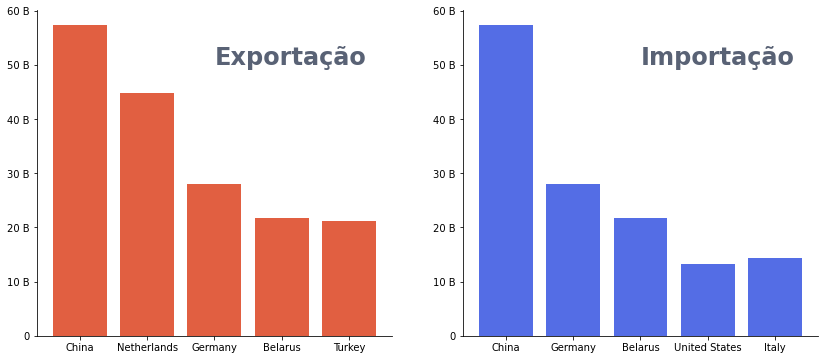

In [74]:
#Gŕaficos em barra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

#Gráfico 1
ax[0].bar(exports_partners.partner, exports_partners.export_total, color=red)

#Gráfico 2
ax[1].bar(imports_partners.partner, imports_partners.export_total, color=blue)

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

#Personaliza o ytick
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(format_tick))

#Título
ax[0].text(2, 50000000000,'Exportação', fontsize=24, color=gray, fontweight='bold')
ax[1].text(2, 50000000000,'Importação', fontsize=24, color=gray, fontweight='bold')

fig.savefig('partners.png')


Os principais parceiros de exportação correspondem à 23,8% do total. Entre eles dois países pertencem à União Européia (Holanda e Alemanha), a Turquia é candidata à adesão.

Os principais parceiros de importação correspondem a 47% do valor total. Entre eles estão os Estados Unidos e dois países da União Européia, Alemanha e Itália.

##Sanções

Em 2008, a Rússia invadiu um dos países vizinhos, Geórgia. Durante e após a invasão não foram aplicadas sanções comerciais à Rússia.
Em 2009, os valores de exportação e importação baixaram, mas dois anos após a invasão (2011) ultrapassaram os valores de 5 bilhões e 3 bilhões, respectivamente.

|Ano|Importações|Exportações|
|:-:|:-:|:-:|
|2008|267 B|457 B|
|2009|170 B|301 B|
|2011|306 B|516 B|

Em 2014, a Rússia anexou a Crimeia que pertencia ao território Ucraniano. No mesmo anos a União Européia e os Estados Unidos anunciaram sanções econômicas contra a Rússia. As sanções foram sobre comércio no setor bélico, energético e agropecuário.

Após as sanções de 2014, os valores de exportações e importações sofreram novas baixas, voltando a demostrar melhoras somente 2017.

|Ano|Importações|Exportações|
|:-:|:-:|:-:|
|2014|286 B|497 B|
|2015|182 B|343 B|
|2017|259 B|379 B|

Em 2022, tropas russas invadiram a Ucrânia, desta vez com destino à capital, Kiev. Em pouco tempo, líderes mundiais anunciaram sanções comerciais.

Os Estados Unidos anunciaram que bloquearão o banco central de realizar transações em dólar americano e restrições de exportação para a Rússia que afetarão o setor de tecnologia.

>"this includes Russia-wide restrictions on semiconductors, telecommunication, encryption security, lasers, sensors, navigation, avionics and maritime technologies." White House

O Reino Unido também pretende limitar exportações na área de tercnologia e transações bancárias com a Rússia.

>"in sectors including electronics, telecommunications, and aerospace," Boris Johnson

A União européia anunciou que irá rever as importações no setor energético oriundos da Rússia e, assim como Reino Unido e EUA, irá impedir transações bancárias de alguns bancos da Rússia.

A Turquia anunciou restrições portuárias à navios russos.

A Alemanha anunciou que irá cancelar a inauguração do gasoduto North Stream 2 e estuda rever a importação de gás natural pelo North Stream 1.

A Itália anunciou que pretende rever a importação de gás natural da Rússia e também irá restringir ações banćarias russas.

As sanções atingem principalmente os setores:
- Bancário
- Energético
- Tecnológico
- Portuário

##Rússia e Brasil | 2019

O Brasil e a Rússia compõem o [BRICS](https://pt.wikipedia.org/wiki/BRICS) juntamente com a China, Índia e África do Sul. Além de interesses políticos, os países compartilham de interesses econômicos.

Desde o começo dos ataques à Ucrânia, o Brasil mantem a tradicional neutralidade diplomatica em conflitos bélicos internacionais. Até o momento não anunciou qualquer sanção econômica contra a Rússia.

O Brasil importa principalmente produtos químicos, combustíveis da Rússia e exporta principalmente produtos de origem vegetal e animal. Entre os produtos químicos estão algumas matérias primas utilizadas na agroindústria brasileira.


Comércio Rússia - Brasil:
- Exportações: US$ 2,4 Bilhões.

- Importações: US$ 2,1 Bilhões.

In [75]:
year = '2019'

In [76]:
imports = wits.get_indicator('MPRT-TRD-VL', reporter='rus', year=year, partner='bra')
exports = wits.get_indicator('XPRT-TRD-VL', reporter='rus', year=year, partner='bra')

In [77]:
imports = imports.loc['Annual'].loc['Russian Federation'].loc['Brazil']
exports = exports.loc['Annual'].loc['Russian Federation'].loc['Brazil']

In [78]:
sectors = products.loc[(products.grouptype=='Sector') & (products.index!='Total')].productdescription.values

In [79]:
imports_musd = imports.loc[sectors].Value
exports_musd = exports.loc[sectors].Value

In [82]:
#Plotagem
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=sectors, values=imports_musd, name="Imports"), 1, 1)
fig.add_trace(go.Pie(labels=sectors, values=exports_musd, name="Exports"), 1, 2)

fig.update_traces(hole=.4, 
                    #scalegroup='rus',
                    textinfo='label',
                    hovertemplate = "%{label}<br>%{value:,.0f}M$<br>%{percent}")

fig.update_layout(
      title_text="Estatística do comércio | Rússia - Brasil | " + str(year),
      annotations=[dict(text='Importações<br>{:.2f}B$'.format(imports_musd.sum()/1e6),
                        x=0.17, y=0.5, font_size=16, showarrow=False),
                  dict(text='Exportações<br>{:.2f}B$'.format(exports_musd.sum()/1e6),
                        x=0.83, y=0.5, font_size=16, showarrow=False)
                        ]
  )

#plotly.offline.plot(fig, filename='/content/'+ year +'.html')
fig.show();

##Conclusões

Além das sanções bancarias e portuárias. Algumas sanções comerciais (importação e exportação) podem resultar em prejuízos à Rússia:

*   Setor energético, corresponde à 50% das exportações russas.
*   Setor de máquinas e eletrônicos, corresponde à 29% das importações russas.
* Mais parceiros comerciais teriam que participar das sanções, entre eles a China.

A Rússia já sofreu sanções no passado, possui resiliência para contornar as sanções.

O conflito ainda não terminou, precisamos aguardar os próximos acontecimentos para verificarmos as consequencias das sanções.

